# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Dai | Wuran | Dai Wuran, 2024-11-28 | 8 | 25 |
| Member 2: | Fre | Ashal | Fre Ashal, 2024-11-28 | 8 | 25 |
| Member 3: | De-graft | Godwyll | De-graft Godwyll, 2024-11-28 | 8 | 25 |
| Member 4: | Kwadwo | Asare-Menako | Kwadwo Asare-Menako, 2024-11-28 | 8 | 25 |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [3]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [4]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = pd.read_csv('UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('2020-03-14-16-45-35.csv')

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [5]:
# TODO: Display first two rows of cv_set
# (1 mark)
print(cv_set.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [6]:
# TODO: Load the info method of cv_set
# (1 mark)
print(cv_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [7]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [8]:
# TODO: Display all columns in cv_set
# (1 mark)
print(cv_set.columns)

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [9]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [10]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop('motion_state', axis=1)
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [12]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [13]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', SVC())])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [14]:
# TODO - Setup grid set
# (4 marks)
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

In [15]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [16]:
# TODO: Print the results from the grid search
# (2 marks)
best_train_score = grid.cv_results_['mean_train_score'][grid.best_index_]
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(best_train_score))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.best_estimator_.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.98
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



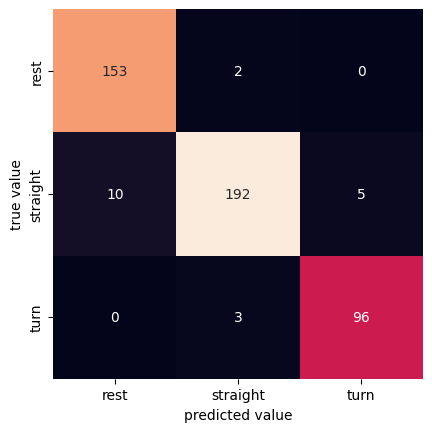

In [17]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

y_pred = grid.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],  yticklabels=['rest', 'straight', 'turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')
print(classification_report(y_test, y_pred))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. The model fits the dataset well, as indicated by the high cross-validation train score (0.98), validation score (0.95), and test-set score (0.96). The small gap between these scores suggests the model generalizes effectively to unseen data.

2. The intervals for C and gamma are suitable as they cover a wide range of values, allowing the grid search to explore both underfitting (low C, high gamma) and overfitting (high C, low gamma) scenarios, ensuring the best parameters can be identified.
  

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [18]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop('motion_state', axis=1)
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [19]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop('motion_state', axis=1)
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [20]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)

print("test_set1 score: {:.2f}".format(grid.best_estimator_.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.best_estimator_.score(X2, y2)))

test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



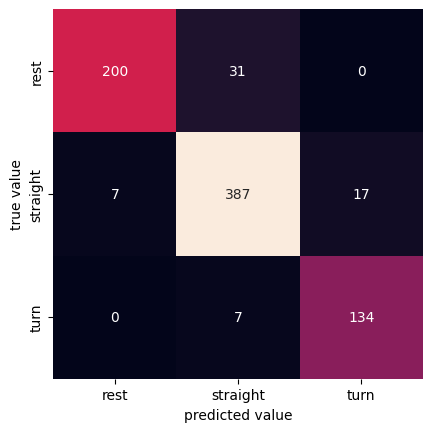

In [21]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)
y_pred = grid.predict(X1)
conf_mat = confusion_matrix(y1, y_pred)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],  yticklabels=['rest', 'straight', 'turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')
print(classification_report(y1, y_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



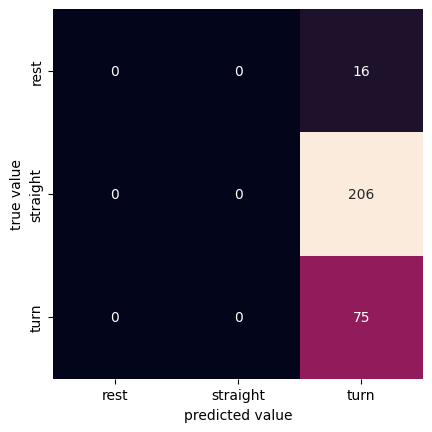

In [22]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y_pred = grid.predict(X2)
conf_mat = confusion_matrix(y2, y_pred)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],  yticklabels=['rest', 'straight', 'turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')
print(classification_report(y2, y_pred))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. The model achieves a high Test-set score (0.96) and performs well on (X1, y1) with an accuracy of 0.92, indicating good generalization to data similar to the training set. However, the performance drops drastically on (X2, y2) with an accuracy of 0.25, where it predicts only the "turn" class effectively. This significant difference in performance is an example of dataset shift or distribution mismatch, where the features of (X2, y2) differ significantly from the training and validation datasets, leading to poor generalization.

2. The observed performance behavior could be due to the distribution of features in (X2, y2) differs significantly from the training data, causing the model's poor generalization. This maybe because the data in (X2, y2) comes from a different source or time period, leading to mismatches in patterns the model was trained on. Additionally, class imbalance in (X2, y2), where certain classes are underrepresented or missing compared to the training data, could contribute to the poor performance. Lastly, there may be some significant noise or outliers in the datasets (X2, y2), which also results in the poor performance of the model.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [23]:
# TODO - Load selected features from cv_set to X
# (1 marks)
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [24]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [25]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', SVC())])
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [26]:
# TODO: Print the results from the grid search
best_train_score = grid.cv_results_['mean_train_score'][grid.best_index_]
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(best_train_score))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.best_estimator_.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.84
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.

              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



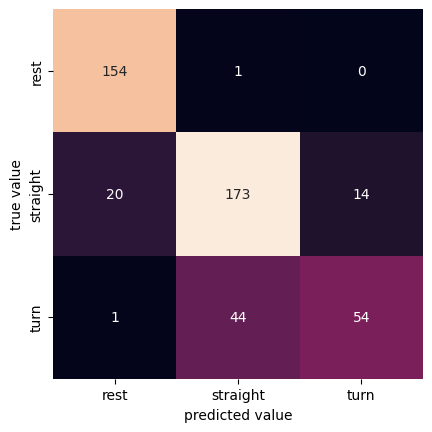

In [27]:
# TODO - Display confusion matrix and print classification reports
y_pred = grid.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],  yticklabels=['rest', 'straight', 'turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')
print(classification_report(y_test, y_pred))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1. The first model is a better fit, with a training score of 0.98, validation score of 0.95, and test score of 0.96. The small difference between the training and validation scores suggests good generalization without overfitting. In contrast, the second model has lower scores: training 0.84, validation 0.82, and test 0.83. The overall lower scores, indicates that the model might be underfitting and not generalizing well.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [28]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [29]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [30]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.best_estimator_.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.best_estimator_.score(X2, y2)))

test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



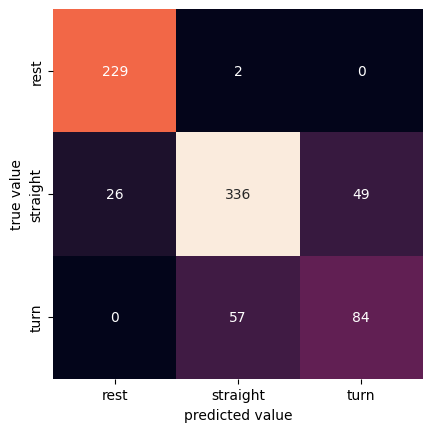

In [31]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y_pred = grid.predict(X1)
conf_mat = confusion_matrix(y1, y_pred)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],  yticklabels=['rest', 'straight', 'turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')
print(classification_report(y1, y_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



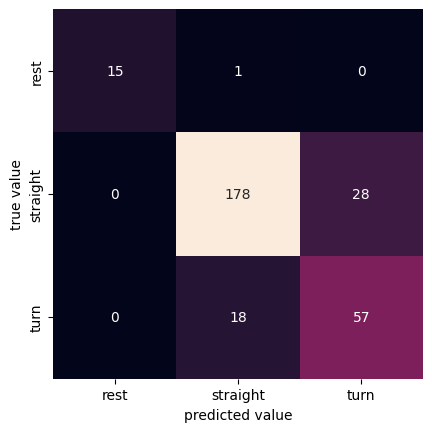

In [32]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y_pred = grid.predict(X2)
conf_mat = confusion_matrix(y2, y_pred)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],  yticklabels=['rest', 'straight', 'turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')
print(classification_report(y2, y_pred))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1. The model shows consistent performance across the training/validation set (scores of 0.84 and 0.82) and the two testing sets (scores of 0.83 and 0.84). This indicates that the model fits not bad on the two testing sets generalizes effectively without significant overfitting or underfitting.

2. In Section 1, the model performs well on the training set (train score: 0.98), test_set1 (0.92), but poorly on test_set2 (0.25). The large drop in performance on test_set2 suggests a potential dataset shift or mismatch.

  In Section 2, the model has lower training (0.84) and validation (0.82) scores but shows more consistent performance across the testing datasets (test_set1: 0.83, test_set2: 0.84), indicating better generalization.

  Overall, the first model performs better on test_set1, but the second model offers more stable performance across all datasets, with more consistent generalization.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

In [46]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = cv_set.drop('motion_state', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_scaled)

components = pca.components_  # shape = (12, 32)

for i in range(12):
    print(components[i])

contributions = np.abs(components).sum(axis=0)

for feature_idx, contribution in enumerate(contributions):
    print(f"Features {feature_idx + 1} Contribution:{contribution}")

top_features = np.argsort(contributions)[-10:]
print("Index:", top_features)

[-0.02217221 -0.00913272  0.00373031  0.0011257   0.01097184  0.02716267
  0.22231107  0.09753399  0.23339009  0.22909659  0.22736606  0.20033708
  0.1961822   0.06568914  0.23120404  0.13353426 -0.21605846 -0.22660787
 -0.23890158 -0.21868076 -0.20085451  0.00596862 -0.23349643  0.06283181
  0.20708895  0.22660104  0.23757907  0.220893    0.20800967  0.0466731
  0.24262793  0.14553535]
[-0.43752047 -0.01260811  0.00870051  0.01451442  0.07338031  0.47118018
 -0.00728986  0.12447403 -0.0047232  -0.05884085 -0.04712607 -0.04139264
  0.02944712  0.10224567 -0.04869525  0.06332882 -0.17797357  0.0268139
  0.03659974  0.0450162   0.00619583  0.45050146  0.03471238  0.12751495
 -0.19887821 -0.04264327 -0.03189501 -0.02618741  0.04563604  0.47591094
 -0.03320933  0.10536113]
[ 0.096691   -0.00728859 -0.11813604 -0.15684783 -0.04395884 -0.13907744
 -0.00829802  0.45122764 -0.03346317 -0.10727792 -0.11669096 -0.04368448
  0.07831561  0.36460451 -0.10992735  0.29833145  0.06321318  0.04946057
 

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1. The features we select: [gx_min, ax_sum,	gx_var,	gy_var,	g_min,	ay_sum,	az_sum,	gz_var, gy_sum,	gx_sum]. We chose these 10 features using PCA because they explain most of the variation in the data. By selecting the most important features, we can reduce noise and overfitting, while keeping the key information needed for the model to perform well.

In [47]:
# TODO - Load group selected features from cv_set to X
selected_columns = [19, 0, 11, 12, 23, 1, 2, 13, 4, 3]
X = cv_set.iloc[:, selected_columns]
X.head(2)

,gx_min,ax_sum,gx_var,gy_var,g_min,ay_sum,az_sum,gz_var,gy_sum,gx_sum
0,-0.000178,-0.003929,2.365611e-09,6.964705e-10,0.000003,-0.093081,9.789349,7.446916e-10,0.001406,-0.002649
1,-0.000141,-0.000966,2.242613e-09,6.533136e-10,0.000006,-0.092417,9.789095,6.983481e-10,0.000103,-0.001806


In [48]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [49]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', SVC())])
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [50]:
# TODO: Print the results from the grid search
best_train_score = grid.cv_results_['mean_train_score'][grid.best_index_]
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(best_train_score))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.best_estimator_.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.99
Best cross-validation validation score: 0.92
Test-set score: 0.91


Display the confusion matrix and print the classification report for the trained model using the *test* split.

              precision    recall  f1-score   support

        rest       0.96      0.99      0.97       155
    straight       0.95      0.85      0.90       207
        turn       0.78      0.92      0.85        99

    accuracy                           0.91       461
   macro avg       0.90      0.92      0.91       461
weighted avg       0.92      0.91      0.91       461



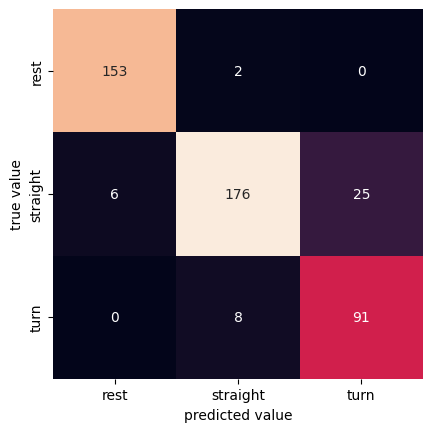

In [51]:
# TODO - Display confusion matrix and print classification report
y_pred = grid.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],  yticklabels=['rest', 'straight', 'turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')
print(classification_report(y_test, y_pred))

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [52]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1.iloc[:, selected_columns]
X1.head(2)

,gx_min,ax_sum,gx_var,gy_var,g_min,ay_sum,az_sum,gz_var,gy_sum,gx_sum
0,-0.000168,0.264465,3.655217e-09,6.507877e-10,0.000003,0.089904,9.786930,7.727190e-10,0.000218,-0.002305
1,-0.000148,0.264300,3.349120e-09,6.788807e-10,0.000007,0.088882,9.788127,8.871433e-10,-0.000523,-0.001865


In [53]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.iloc[:, selected_columns]
X2.head(2)

,gx_min,ax_sum,gx_var,gy_var,g_min,ay_sum,az_sum,gz_var,gy_sum,gx_sum
0,-0.000115,-0.046400,1.718706e-09,1.211633e-09,0.000007,0.305907,9.791451,1.405038e-09,0.001311,-0.002184
1,-0.000128,-0.050073,2.179497e-09,1.893673e-09,0.000013,0.311947,9.785619,1.164381e-09,0.001898,-0.003369


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [54]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.best_estimator_.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.best_estimator_.score(X2, y2)))

test_set1 score: 0.74
test_set2 score: 0.39


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

              precision    recall  f1-score   support

        rest       0.95      0.51      0.66       231
    straight       0.73      0.81      0.77       411
        turn       0.64      0.94      0.76       141

    accuracy                           0.74       783
   macro avg       0.77      0.75      0.73       783
weighted avg       0.78      0.74      0.73       783



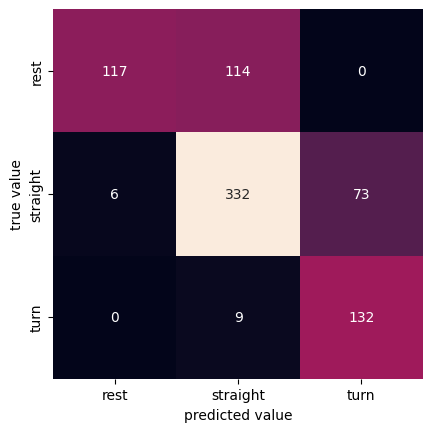

In [42]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y_pred = grid.predict(X1)
conf_mat = confusion_matrix(y1, y_pred)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],  yticklabels=['rest', 'straight', 'turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')
print(classification_report(y1, y_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.72      0.20      0.32       206
        turn       0.31      1.00      0.48        75

    accuracy                           0.39       297
   macro avg       0.35      0.40      0.27       297
weighted avg       0.58      0.39      0.34       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


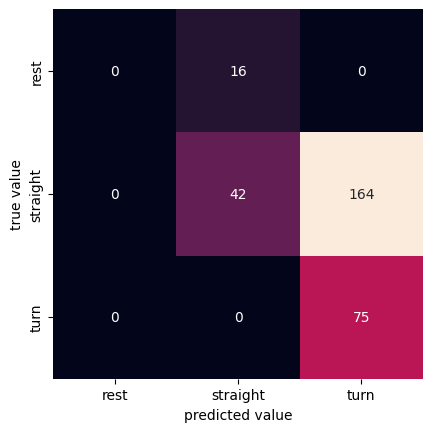

In [55]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y_pred = grid.predict(X2)
conf_mat = confusion_matrix(y2, y_pred)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],  yticklabels=['rest', 'straight', 'turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')
print(classification_report(y2, y_pred))

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1. The model in this section has a bit higher training (0.99) score than Section 1 (training: 0.98) and a bit lower validation (0.92) than Section 1 validation: 0.95. However, this section's test-set score (0.91) is lower than Section 1's (0.96), and it performs worse on test_set1 (0.74 vs 0.92) and a bit better on test_set2 (0.39 vs 0.25). This suggests that the model in this section may have overfitted to the training data and doesn't generalize well.

  The model in this section outperforms Section 2 in training (0.99 vs 0.84) and validation (0.92 vs 0.82) scores. However, Section 2's model performs better on the test sets, with test_set1 (0.83 vs 0.74) and test_set2 (0.84 vs 0.39) showing stronger generalization. This indicates Section 2's model is more robust and generalizes better to new data.
  
2. The differences in performance across the sections can be attributed to several factors. The models in Section 1 and this section show high training and validation scores (0.98, 0.99) but struggle on the test sets, especially this section (0.74 and 0.39), indicating overfitting. These models likely learned patterns specific to the training data, failing to generalize well. In contrast, the model in Section 2, which used feature selection, performed better on the test sets (test_set1: 0.83, test_set2: 0.84), suggesting that reducing feature complexity helped improve generalization and avoid overfitting.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [56]:
# TODO - Load all features from cv_set to X
X = cv_set.drop('motion_state', axis=1)
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [57]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [58]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [59]:
# Perform any missing imports
from sklearn.decomposition import PCA
# TODO - Initiate the pipeline
# (1 marks)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('classifier', SVC())])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [60]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'pca__n_components': [4, 7, 11, 14, 16],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

In [61]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'pca__n_components': [4, 7, 11, 14, 16],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search
best_train_score = grid.cv_results_['mean_train_score'][grid.best_index_]
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(best_train_score))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.best_estimator_.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'pca__n_components': 14, 'scaler': RobustScaler()}

Best cross-validation train score: 0.97
Best cross-validation validation score: 0.94
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model using the *test* split.

              precision    recall  f1-score   support

        rest       0.94      0.99      0.97       155
    straight       0.98      0.93      0.96       207
        turn       0.94      0.98      0.96        99

    accuracy                           0.96       461
   macro avg       0.96      0.97      0.96       461
weighted avg       0.96      0.96      0.96       461



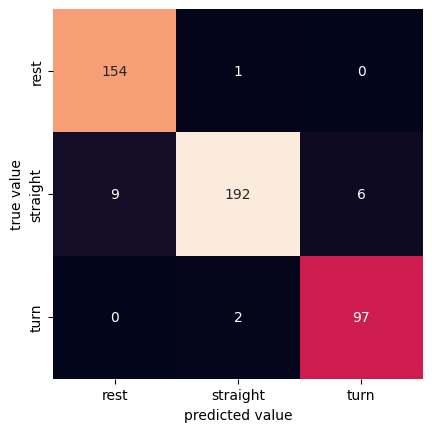

In [ ]:
# TODO - Display confusion matrix and print classification report
y_pred = grid.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],  yticklabels=['rest', 'straight', 'turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')
print(classification_report(y_test, y_pred))

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1.drop('motion_state', axis=1)
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop('motion_state', axis=1)
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.best_estimator_.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.best_estimator_.score(X2, y2)))

test_set1 score: 0.93
test_set2 score: 0.67


              precision    recall  f1-score   support

        rest       0.92      0.97      0.94       231
    straight       0.96      0.91      0.93       411
        turn       0.88      0.96      0.92       141

    accuracy                           0.93       783
   macro avg       0.92      0.94      0.93       783
weighted avg       0.93      0.93      0.93       783



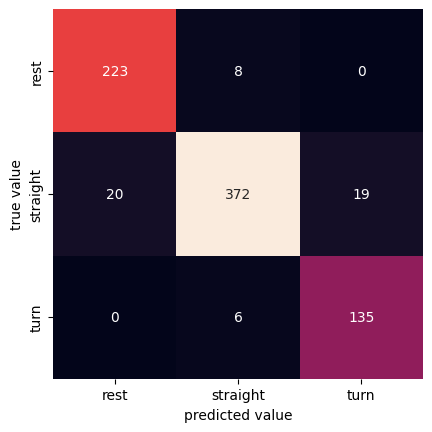

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y_pred = grid.predict(X1)
conf_mat = confusion_matrix(y1, y_pred)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],  yticklabels=['rest', 'straight', 'turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')
print(classification_report(y1, y_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

              precision    recall  f1-score   support

        rest       1.00      0.31      0.48        16
    straight       0.91      0.58      0.71       206
        turn       0.46      0.99      0.63        75

    accuracy                           0.67       297
   macro avg       0.79      0.63      0.60       297
weighted avg       0.80      0.67      0.67       297



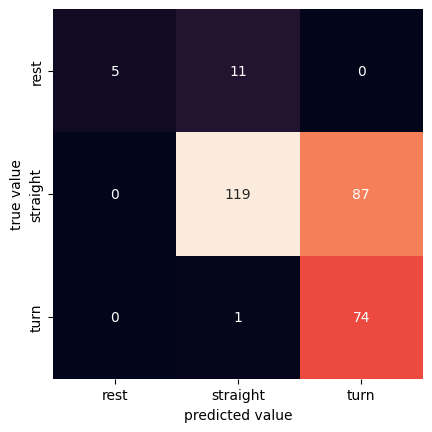

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y_pred = grid.predict(X2)
conf_mat = confusion_matrix(y2, y_pred)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],  yticklabels=['rest', 'straight', 'turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')
print(classification_report(y2, y_pred))

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers
1. The model trained in Section 1 performed well on the training and validation sets (train: 0.98, validation: 0.95), but struggled on test_set2 (0.25), while performing relatively well on test_set1 (0.92).  In contrast, the model with PCA in this section performed consistently well across all datasets, with test_set1 score at 0.93 and test_set2 score at 0.67, showing better generalization and less overfitting compared to Section 1's model.

  The model in Section 2 showed moderate performance on all datasets, with test_set1 at 0.83, test_set2 at 0.84, and cross-validation scores (train: 0.84, validation: 0.82). The model trained in this section using PCA outperforms Section 2 on test_set1: 0.93, and a bit worse on test_set2: 0.67. PCA seems to have helped in achieving higher performance in a way while reducing potential feature-related noise.

  In Section 3, the group also used PCA to choose subset of the features, but the performance is not good as this section. The model in Section 3 showed high performance on training data (train: 0.99), but struggled with test_set1 (0.74) and test_set2 (0.39), similar to the model in Section 1. In this Section, the model performed better across all three datasets, with test_set1 at 0.93, and test_set2 at 0.67. Different performance with using same method with PCA indicates the mistakes or errors in the Section 3, in which the group choose the features.

2. The differences in performance between Section 1 and Section 4 can be attributed to overfitting in Section 1, where the model performed well on the training data (0.98) but poorly on unseen data like test_set2 (0.25). In contrast, Section 4's use of PCA improving the model’s generalization and stability across all datasets (test_set1: 0.93, test_set2: 0.67). The dimensionality reduction in Section 4 likely prevented overfitting, leading to better performance on both test sets and making it more robust compared to the model in Section 1. This suggest that feature selection and dimensionality reduction with PCA helped avoid overfitting, yielding better generalization.

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1.

In [62]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [63]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [64]:
# TODO - Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [65]:
# Perform any missing imports
from sklearn.ensemble import RandomForestClassifier
# TODO - Initiate the pipeline
# (1 mark)
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier(random_state=42))])

In [66]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [67]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [69]:
# TODO: Print the results from the grid search
best_train_score = grid.cv_results_['mean_train_score'][grid.best_index_]
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(best_train_score))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.best_estimator_.score(X_test, y_test)))

Best params:
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50, 'scaler': StandardScaler()}

Best cross-validation train score: 0.97
Best cross-validation validation score: 0.85
Test-set score: 0.84


Display the confusion matrix and print the classification report for the trained model using the *test* split.

              precision    recall  f1-score   support

        rest       0.96      0.94      0.95       155
    straight       0.80      0.86      0.83       207
        turn       0.71      0.63      0.67        99

    accuracy                           0.84       461
   macro avg       0.82      0.81      0.81       461
weighted avg       0.83      0.84      0.83       461



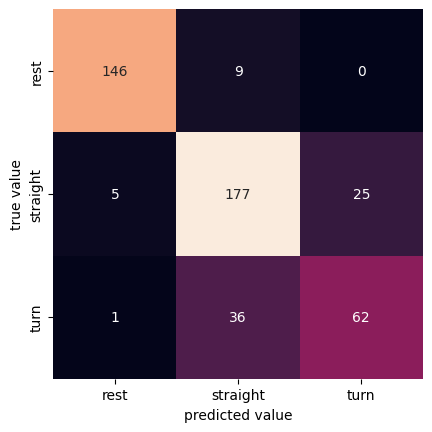

In [70]:
# TODO - Display confusion matrix and print classification report
y_pred = grid.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],  yticklabels=['rest', 'straight', 'turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')
print(classification_report(y_test, y_pred))

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [71]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [72]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [73]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.best_estimator_.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.best_estimator_.score(X2, y2)))

test_set1 score: 0.85
test_set2 score: 0.72


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

              precision    recall  f1-score   support

        rest       0.98      0.97      0.98       231
    straight       0.84      0.87      0.86       411
        turn       0.62      0.58      0.60       141

    accuracy                           0.85       783
   macro avg       0.82      0.81      0.81       783
weighted avg       0.84      0.85      0.85       783



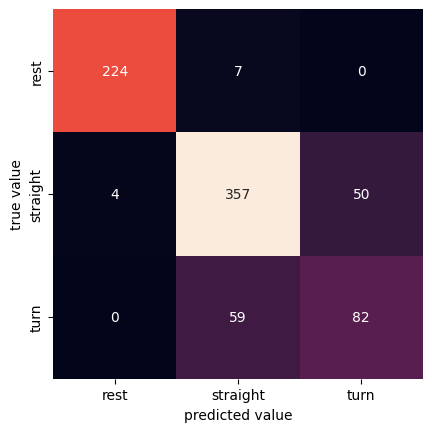

In [74]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y_pred = grid.predict(X1)
conf_mat = confusion_matrix(y1, y_pred)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],  yticklabels=['rest', 'straight', 'turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')
print(classification_report(y1, y_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

              precision    recall  f1-score   support

        rest       1.00      0.69      0.81        16
    straight       0.92      0.65      0.76       206
        turn       0.49      0.92      0.64        75

    accuracy                           0.72       297
   macro avg       0.80      0.75      0.74       297
weighted avg       0.82      0.72      0.73       297



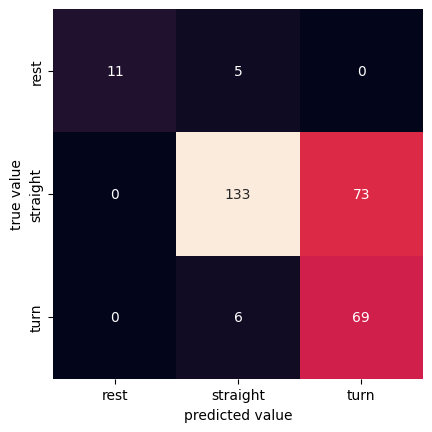

In [75]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y_pred = grid.predict(X2)
conf_mat = confusion_matrix(y2, y_pred)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],  yticklabels=['rest', 'straight', 'turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')
print(classification_report(y2, y_pred))

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1. The random forest model in this section performs slightly better on test_set1 (0.85 vs 0.83) and the overall test set (0.84 vs 0.83) compared to the SVC model in Section 2. This suggests that the random forest model in this section is a bit better at handling the variability in test_set1 and generalizing across the dataset. The random forest's ensemble approach allows it to combine multiple decision trees, which tends to make it more robust to overfitting.

  However, on test_set2, the SVC model performs significantly better (0.84 vs 0.72). This could indicate that the SVC model is better suited to handle the specific characteristics of test_set2, possibly due to the choice of features. The lower performance of the random forest model on test_set2 may be due to the complexity of the decision trees, which might not generalize well to the unseen data in test_set2.


____